In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline


from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 10% !important; height: 10% !important;} </style>"
HTML(style)

import os
os.environ["PATH"] += os.pathsep + \
    "D:\\6DATA_SCIENCE\\Graphviz_for_python\\bin" + os.pathsep + "D:\6DATA_SCIENCE\Graphviz_for_python"

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = df.drop(['Cabin', 'PassengerId', 'Ticket', 
              'Survived', 'Name'], axis=1)

In [6]:
y = df.Survived

In [7]:
X = pd.get_dummies(X)

In [8]:
X = X.fillna({'Age': X.Age.median()})

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3)

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
clf.score(X_train, y_train)

0.8238255033557047

In [16]:
clf.score(X_test, y_test)

0.8203389830508474

In [17]:
max_depth_values = range(1,100)

scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                              'train_score': [train_score],
                              'test_score': [test_score],
                            'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [18]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [19]:
scores_data_long = pd.melt(scores_data, 
                            id_vars=['max_depth'],
                            value_vars=['train_score', 'test_score', 'cross_val_score'],
                            var_name='set_type',
                            value_name='score'
                          )

In [20]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.803711
207,10,cross_val_score,0.798669


In [21]:
scores_data_long.query('set_type == "test_score"').head(20)

,max_depth,set_type,score
99,1,test_score,0.796610
100,2,test_score,0.776271
101,3,test_score,0.820339
102,4,test_score,0.823729
103,5,test_score,0.810169
104,6,test_score,0.769492
105,7,test_score,0.783051
106,8,test_score,0.800000
107,9,test_score,0.800000
108,10,test_score,0.793220


<AxesSubplot:xlabel='max_depth', ylabel='score'>

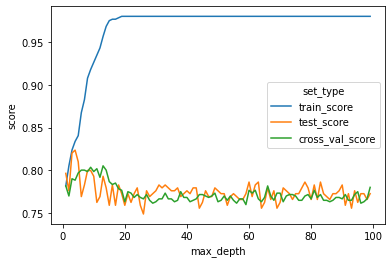

In [22]:
sns.lineplot(x='max_depth', y='score',hue='set_type',
            data=scores_data_long)

In [23]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=6)

In [24]:
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7694915254237288

### GridSearchCV - сам выбирает наилучшие параметры

In [25]:
clf = tree.DecisionTreeClassifier()

In [66]:
parameters = {'criterion': ['gini', 'entropy'],
             'max_depth': range(2,10),
             'min_samples_split': range(2,30,2), 'min_samples_leaf': range(15,25,2)}

In [67]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=4)

In [68]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_leaf=10,
                                              min_samples_split=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(15, 25, 2),
                         'min_samples_split': range(2, 30, 2)})

In [69]:
grid_search_cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 21,
 'min_samples_split': 2}

In [70]:
best_clf = grid_search_cv_clf.best_estimator_

In [71]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [72]:
y_pred = best_clf.predict(X_test)

In [73]:
precision_score(y_test, y_pred)

0.8315789473684211

In [74]:
recall_score(y_test, y_pred)

0.6583333333333333

In [75]:
f1_score(y_test, y_pred)

0.7348837209302326

### Влияние вероятности выживания на оценку качества модели

In [76]:
y_predicted_prob = best_clf.predict_proba(X_test)

<AxesSubplot:>

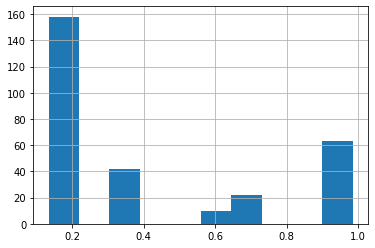

In [77]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [78]:
y_pred = np.where(y_predicted_prob[:,1] > 0.5, 1, 0)

In [79]:
precision_score(y_test, y_pred)

0.8315789473684211

In [80]:
recall_score(y_test, y_pred)

0.6583333333333333

### ROC-кривая

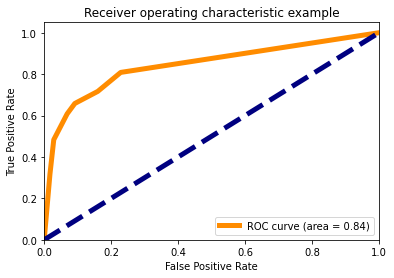

In [81]:
from sklearn.metrics import roc_curve, auc
lw = 5 #ширина кривой

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Идем сверху по кривой и стараемся получить максимальное TP при минимальном FP (т.е. наибольший F1 score). В данном случае я бы выбрал TP=0.83 и FP=0.21.

## Неделя №3

In [92]:
clf = tree.DecisionTreeClassifier( \
    criterion='entropy', max_depth=3,
    min_samples_split=2, min_samples_leaf=21)

In [93]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=21)

In [116]:
feature_importances = clf.feature_importances_

In [117]:
feature_importances_df0 = pd.DataFrame({'features': list(X_train),
    'feature_importances': feature_importances})

In [118]:
feature_importances_df0.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.584013
0,Pclass,0.250697
1,Age,0.069729
4,Fare,0.052619
9,Embarked_S,0.042942
2,SibSp,0.000000
3,Parch,0.000000
5,Sex_female,0.000000
7,Embarked_C,0.000000
8,Embarked_Q,0.000000


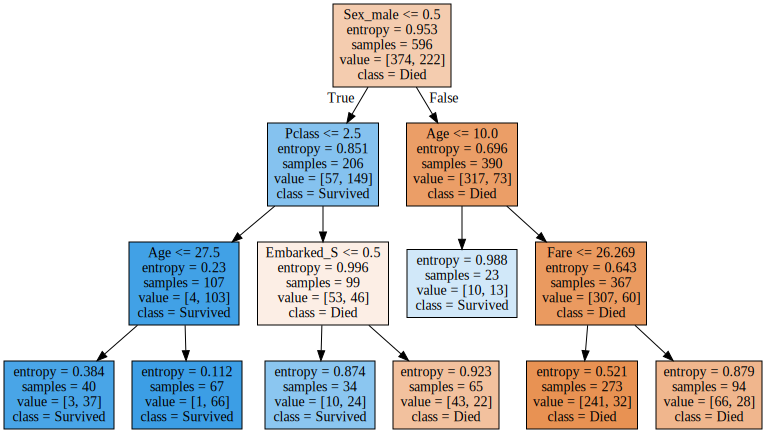

In [94]:
graph = Source(tree.export_graphviz(clf,
    out_file=None, feature_names=list(X),
    class_names=['Died', 'Survived'],
    filled=True))

display(SVG(graph.pipe(format='svg')))

### RandomForest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
clf_rf = RandomForestClassifier()

In [99]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7]}

grid_search_clf_rf = GridSearchCV(clf_rf, parameters, cv=5)

In [104]:
grid_search_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7], 'n_estimators': [10, 20, 30]})

In [105]:
grid_search_clf_rf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [107]:
best_clf = grid_search_clf_rf.best_estimator_

In [108]:
best_clf.score(X_test, y_test)

0.8135593220338984

In [110]:
feature_importances = best_clf.feature_importances_

In [111]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
    'feature_importances': feature_importances})

In [114]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.289514
5,Sex_female,0.222705
0,Pclass,0.151660
4,Fare,0.140049
1,Age,0.091999
3,Parch,0.035022
7,Embarked_C,0.032507
2,SibSp,0.020451
9,Embarked_S,0.014334
8,Embarked_Q,0.001760
